In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
#poly_model = make_pipeline(PolynomialFeatures(7),LinearRegression())

In [2]:

df = pd.read_csv('Results2.csv')

df.dropna(inplace=True)
df.head()

c:\users\shwet\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (3,9,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,State,FacilityName,FacilityID,UnitID,GDate,GYear,ElectricityGeneration,UnitTechnologyType,FuelType,NameplateCapacityMW,GOwner,GeneratorID,UtilityID,UtilityName,NameplatePowerFactor,SummerCapacityMW,WinterCapacityMW
0,AL,AMEA Sylacauga Plant,56018,1,2015-01-01 00:00:00,2015,0,Natural Gas Combustion Turbine,Pipeline Natural Gas\r,49.3,S,1,Alabama Municipal Elec Authority,40614,0.8,47.5,48.3
1,AL,AMEA Sylacauga Plant,56018,1,2015-01-01 00:00:00,2015,0,Natural Gas Combustion Turbine,Pipeline Natural Gas\r,49.3,S,2,Alabama Municipal Elec Authority,40614,0.8,47.5,48.3
2,AL,AMEA Sylacauga Plant,56018,1,2015-01-02 00:00:00,2015,0,Natural Gas Combustion Turbine,Pipeline Natural Gas\r,49.3,S,1,Alabama Municipal Elec Authority,40614,0.8,47.5,48.3
3,AL,AMEA Sylacauga Plant,56018,1,2015-01-02 00:00:00,2015,0,Natural Gas Combustion Turbine,Pipeline Natural Gas\r,49.3,S,2,Alabama Municipal Elec Authority,40614,0.8,47.5,48.3
4,AL,AMEA Sylacauga Plant,56018,1,2015-01-03 00:00:00,2015,0,Natural Gas Combustion Turbine,Pipeline Natural Gas\r,49.3,S,1,Alabama Municipal Elec Authority,40614,0.8,47.5,48.3


In [22]:


def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_  

df = df.head(4000)

df1 = df.drop(['State','FacilityName','FacilityID','UnitID','GDate','GOwner','UtilityID','GeneratorID','UtilityName','GYear','FuelType'], 1)

encode_text_index(df1, 'UnitTechnologyType')

print(df1.UnitTechnologyType.dtypes)

df1['NameplateCapacityMW']=df1['NameplateCapacityMW'].astype(str).astype(float)
df1['ElectricityGeneration'] = df1['ElectricityGeneration'].astype(float)
df1['UnitTechnologyType'] = df1['UnitTechnologyType'].astype(float)

#df1=df1.drop('NameplateCapacityMW',1)
#df1=df1.drop('ElectricityGeneration',1)
df1.dtypes
#df1.ElectricityGeneration.dtypes

y = df1['ElectricityGeneration']
y.dtypes
x = df1['NameplateCapacityMW']
x.dtypes


print(y.shape)

int64
(4000,)


In [23]:
import statsmodels.api as sm
#x = sm.add_constant(x)

#df1 = df.drop(['State','FacilityName','FacilityID','UnitID','GDate','GOwner','UtilityID','GeneratorID','UtilityName','GYear','FuelType'], 1)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42)
model = sm.OLS(y_train, x_train).fit()
Y_predictions = model.predict(x_test) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     ElectricityGeneration   R-squared:                       0.026
Model:                               OLS   Adj. R-squared:                  0.026
Method:                    Least Squares   F-statistic:                     85.41
Date:                   Mon, 18 Jun 2018   Prob (F-statistic):           4.31e-20
Time:                           17:17:01   Log-Likelihood:                -20816.
No. Observations:                   3200   AIC:                         4.163e+04
Df Residuals:                       3199   BIC:                         4.164e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
NameplateCapacityMW     0.1540      0.017      9.242      0.000       0.121       0.187
==============================================================================
Omnibus:                     1379.671   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5018.717
Skew:                           2.218   Prob(JB):                         0.00
Kurtosis:                       7.239   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
print(mean_squared_error(y_test, Y_predictions))
print(r2_score(y_test, Y_predictions, multioutput='variance_weighted'))
#print(mean_squared_log_error(y_test, Y_predictions))

25530.242300901795
-0.1732232989409659


(3200,)
(3200,)


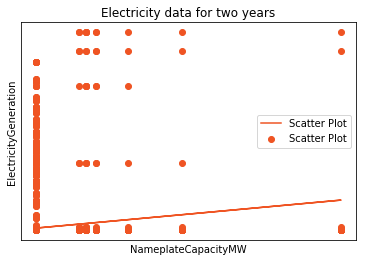

In [25]:
print(x_train.shape)
print(y_train.shape)
plt.scatter(x_train, y_train, c='#ef5423', label='Scatter Plot')

plt.plot(x_test, Y_predictions,  c='#ef5423', label='Scatter Plot')
plt.title("Electricity data for two years")
plt.xlabel("NameplateCapacityMW")
plt.ylabel("ElectricityGeneration")
plt.xticks(())
plt.yticks(())
plt.legend()
plt.show()



In [26]:
#multivariate 
df.dtypes
df2 = df.drop(['State','FacilityName','FacilityID','UnitID','GDate','GOwner','UtilityID','GeneratorID','UtilityName','GYear'], 1)
df2.dtypes
encode_text_index(df2, 'UnitTechnologyType')
encode_text_index(df2,'FuelType')

df2['NameplateCapacityMW']=df2['NameplateCapacityMW'].astype(str).astype(float)
df2['ElectricityGeneration'] = df2['ElectricityGeneration'].astype(float)
df2['UnitTechnologyType'] = df2['UnitTechnologyType'].astype(float)
df2['SummerCapacityMW'] = df2['SummerCapacityMW'].astype(float)
df2['NameplatePowerFactor'] = df2['NameplatePowerFactor'].astype(float)
df2['WinterCapacityMW'] = df2['WinterCapacityMW'].astype(float)
df2['FuelType'] = df2['FuelType'].astype(float)

df2.dtypes
X = df2[['NameplateCapacityMW', 'UnitTechnologyType', 'SummerCapacityMW','NameplatePowerFactor','WinterCapacityMW','FuelType']]
y = df2['ElectricityGeneration']


In [28]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  
#x_train

In [29]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df 


,Coefficient
NameplateCapacityMW,9.242088e-02
UnitTechnologyType,-3.101214e-11
SummerCapacityMW,-4.968198e-01
NameplatePowerFactor,-1.262334e+03
WinterCapacityMW,4.188751e-01
FuelType,0.000000e+00


In [32]:
y_pred = regressor.predict(X_test)  

In [34]:
compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
compare.head(5)


,Actual,Predicted
2230,0.0,78.836108
668,0.0,78.836108
3616,0.0,29.869754
2363,0.0,78.836108
142,0.0,78.836108


In [35]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  


Mean Absolute Error: 102.57346572077982
Mean Squared Error: 22514.5348333388
Root Mean Squared Error: 150.04844162249336


In [39]:
#multivariate leanear regression Using statistical model using NameplateCapacityMW and UnitTechnology 
#formula=' ElectricityGeneration ~ NameplateCapacityMW + UnitTechnologyType + SummerCapacityMW + NameplatePowerFactor + 
#WinterCapacityMW + FuelType', data=df2)

from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as smf
model = smf.ols(formula=' ElectricityGeneration ~ NameplateCapacityMW + UnitTechnologyType +SummerCapacityMW + NameplatePowerFactor + WinterCapacityMW + FuelType ', data=df2)
results_formula = model.fit()
results_formula.params
results_formula.summary()

c:\users\shwet\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1471: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\users\shwet\anaconda3\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
c:\users\shwet\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\shwet\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\users\shwet\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     ElectricityGeneration   R-squared:                       0.027
Model:                               OLS   Adj. R-squared:                  0.026
Method:                    Least Squares   F-statistic:                     27.26
Date:                   Mon, 18 Jun 2018   Prob (F-statistic):           2.37e-22
Time:                           17:21:00   Log-Likelihood:                -25670.
No. Observations:                   4000   AIC:                         5.135e+04
Df Residuals:                       3995   BIC:                         5.138e+04
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              960.7074    330.748      2.905      0.004     312.257    1609.158
NameplateCapacityMW     -0.0030      0.252     -0.012      0.991      -0.498       0.492
UnitTechnologyType   -8.641e-11   3.14e-11     -2.749      0.006   -1.48e-10   -2.48e-11
SummerCapacityMW         0.0036      1.145      0.003      0.998      -2.241       2.248
NameplatePowerFactor -1101.3075    415.692     -2.649      0.008   -1916.295    -286.320
WinterCapacityMW        -0.0004      0.951     -0.000      1.000      -1.865       1.864
FuelType                      0          0        nan        nan           0           0
==============================================================================
Omnibus:                     1857.043   Durbin-Watson:                   0.437
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8124.336
Skew:                           2.320   Prob(JB):                         0.00
Kurtosis:                       8.217   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

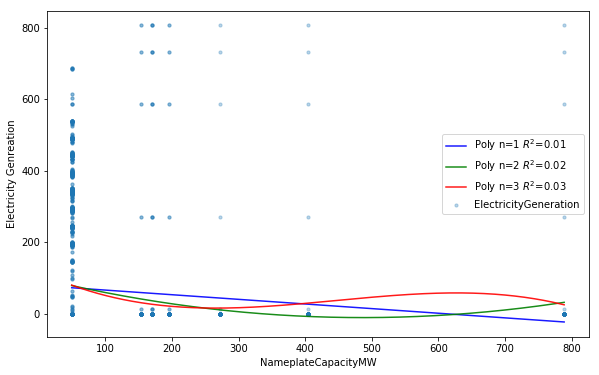

In [37]:


%matplotlib inline
# plot lstat (% lower status of the population) against median value
plt.figure(figsize=(6 * 1.618, 6))
plt.scatter(df2.NameplateCapacityMW, df2.ElectricityGeneration, s=10, alpha=0.3)
plt.xlabel('NameplateCapacityMW')
plt.ylabel('Electricity Genreation')

# points linearlyd space on lstats
x = pd.DataFrame({'NameplateCapacityMW': np.linspace(df2.NameplateCapacityMW.min(), df2.NameplateCapacityMW.max(), 400)})

# 1-st order polynomial
poly_1 = smf.ols(formula='ElectricityGeneration ~ 1 + NameplateCapacityMW ', data=df2).fit()
plt.plot(x.NameplateCapacityMW, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared, 
         alpha=0.9)

# 2-nd order polynomial
poly_2 = smf.ols(formula='ElectricityGeneration ~ 1 + NameplateCapacityMW  + I(NameplateCapacityMW  ** 2.0)', data=df2).fit()
plt.plot(x.NameplateCapacityMW, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, 
         alpha=0.9)

# 3-rd order polynomial
poly_3 = smf.ols(formula='ElectricityGeneration ~ 1 + NameplateCapacityMW  + I(NameplateCapacityMW  ** 2.0) + I(NameplateCapacityMW ** 3.0)', data=df2).fit()
plt.plot(x.NameplateCapacityMW, poly_3.predict(x), 'r-', alpha=0.9,
         label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared)

plt.legend()
#plt.show()